Derive an ordinary differential equation (ODE) for the following circuit consisting of resistors $R$ and capacitors $C$.

<img src="circuit.PNG" width="50%">


Kirchhoff’s circuit laws:
-  Currents in a node sum up to zero
-  Voltages around a loop sum up to zero

Ohm’s law:
-  $U=RI$

Capacitors:
-  $I=C\frac{dU}{dt}$

$U_0=U_0(t)$ is  a  given  function  in  time $t$.

Choose:
-  $U_0(t) = sin(t)$
-  $R1=R2=  1$
-  $C1=  0.47$
-  $C2=  2.2e−3$
-  initial values $U_{C1}(0) =U_{C2}(0)  =  0$.

## Loop of C1, C2, R2

$ U_{R2} + U_{C2} - U_{C1} = 0 $

$ R_2 I_2 + U_{C2} - U_{C1} = 0 $

$ R_2 C_2 \frac{dU_{C2}}{dt} + U_{C2} - U_{C1} = 0 $

$ \frac{dU_{C2}}{dt} = \frac{1}{R_2 C_2} (U_{C1} - U_{C2}) $

## Knot of I1, I2, I3

$ I_1 = I_2 + I_3 $

$ I_3 = I_1 - I_2 $

$ I_1 = U_{R1}/R_1 $

$ U_{R1} = U_0 - U_{C1} $

$ I_2 = U_{R2}/R_2 $

$ U_{R2} = U_{C1} - U_{C2} $

$ I_3 = C_1 \frac{dU_{C1}}{dt} $

$ \frac{dU_{C1}}{dt} = \frac{U_0 - U_{C1}}{R_1 C_1} - \frac{U_{C1} - U_{C2}}{R_2 C_1} $


## ODE

$$ \frac{d}{dt} \left(\begin{array}{c} 
U_{C1}\\
U_{C2}
\end{array}\right)  = \left(\begin{array}{cc} 
\frac{-R_1-R_2}{R_1 R_2 C_1} & \frac{1}{R_2 C_1}\\
\frac{1}{R_2 C_2} & \frac{-1}{R_2 C_2}
\end{array}\right) \left(\begin{array}{c} 
U_{C1}\\
U_{C2}
\end{array}\right) + \left(\begin{array}{c} 
\frac{U_0}{R_1 C_1}\\
0
\end{array}\right)$$


In [49]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

def rhs_rc_circuit(t, u_c12, R1, R2, C1, C2):
    uc1, uc2 = u_c12
    us = np.sin(t)
    
    return [(-R1-R2)/(C1*R1*R2)*uc1 + 1/(R2*C1)*uc2 + us/(R1*C1), uc1/(R2*C2) - uc2/(R2*C2)]

    
sol = solve_ivp(rhs_rc_circuit, [0, 5*2*np.pi], [0, 0], args=(1, 1, 0.47, 2.2e-3),
                dense_output=True)

t = np.linspace(0, 5*2*np.pi, 500)
z = sol.sol(t)


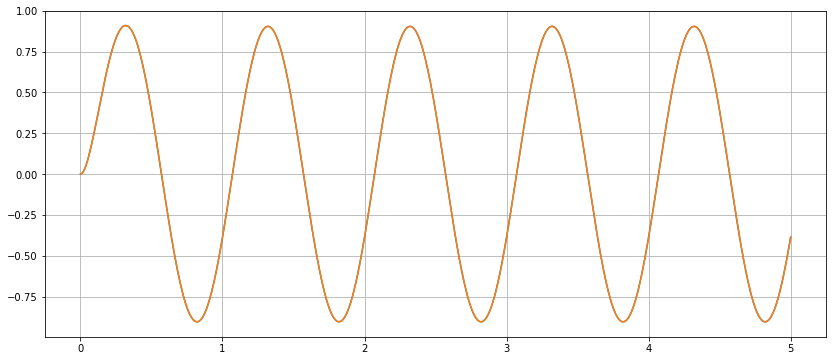

In [51]:
plt.figure(figsize=(14, 6))
plt.plot(t/(2*np.pi), z.T[:,0])

# plt.figure(figsize=(14, 6))
plt.plot(t/(2*np.pi), z.T[:,1])
plt.grid()

<img src="circuit_simulator.PNG">